In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import dataset

Name: Heart Disease UCI

Source: Kaggle

https://www.kaggle.com/ronitf/heart-disease-uci/downloads/heart-disease-uci.zip/1

Attribute Information: 
> 1. age 
> 2. sex 
> 3. chest pain type (4 values) 
> 4. resting blood pressure 
> 5. serum cholestoral in mg/dl 
> 6. fasting blood sugar > 120 mg/dl
> 7. resting electrocardiographic results (values 0,1,2)
> 8. maximum heart rate achieved 
> 9. exercise induced angina 
> 10. oldpeak = ST depression induced by exercise relative to rest 
> 11. the slope of the peak exercise ST segment 
> 12. number of major vessels (0-3) colored by flourosopy 
> 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [1]:
# pd.read_csv("https://www.kaggle.com/ronitf/heart-disease-uci/downloads/heart-disease-uci.zip")

In [2]:
df = pd.read_csv("heart_cleaned.csv", index_col=0)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 35.5 KB


# Data preparation

In [4]:
factor_columns = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "target", "thal"]
numeric_columns = ["age", "trestbps", "chol", "thalach", "oldpeak"]

# Supervised Learning

## Regression 

In this exercise we will try to predict the cholesterol of a person based on the other variables.

Since it's a continuous variable, it's a perfect regression problem

As usual, let's start by preparing our target variable

In [5]:
target = "age"

In [6]:
y = df[target].copy()
X = df.drop([target], axis=1)
print(X.head())
feature_list = list(X.columns)

   sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  \
0    1   3       145   233    1        0      150      0      2.3      0   0   
1    1   2       130   250    0        1      187      0      3.5      0   0   
2    0   1       130   204    0        0      172      0      1.4      2   0   
3    1   1       120   236    0        1      178      0      0.8      2   0   
4    0   0       120   354    0        1      163      1      0.6      2   0   

   thal  target  
0     1       1  
1     2       1  
2     2       1  
3     2       1  
4     2       1  


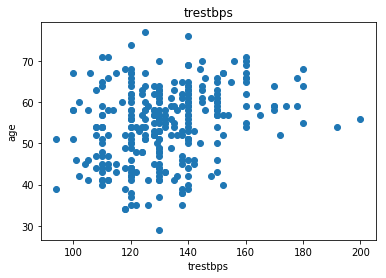

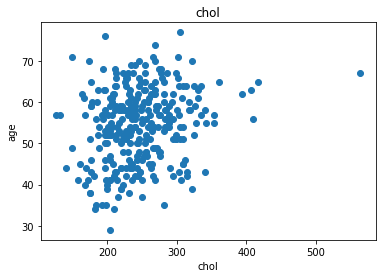

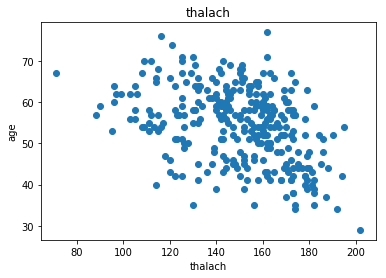

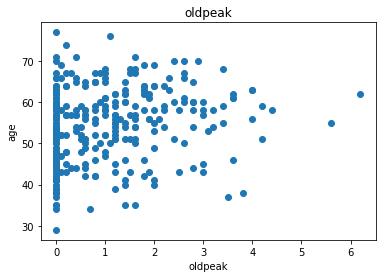

In [7]:
for col in numeric_columns:
    if col != target:
        plt.plot(X[col], y, 'o')
        plt.title(col)
        plt.xlabel(col)
        plt.ylabel(target)
        plt.show()

Then we need to split the data into a training and testing set to be able to evaluate the quality of our model and its generalizability

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print("X_train shape = {}".format(X_train.shape))
print("X_test shape = {}".format(X_test.shape))

X_train shape = (212, 13)
X_test shape = (91, 13)


### Multiple Linear Regression

Now let's train our model

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

It's time to evaluate the model

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_regression(actuals, preds):
    
    print("RMSE = {:.1f}".format(np.sqrt(mean_squared_error(actuals, preds))))
    print("MAE = {:.1f}".format(mean_absolute_error(actuals, preds)))

    print("\nR² = {:.2f}\n\n".format(r2_score(actuals, preds)))

In [11]:
y_pred_train = model.predict(X_train)

print("In sample evaluation \n---------------------")
evaluate_regression(y_train, y_pred_train)

In sample evaluation 
---------------------
RMSE = 7.4
MAE = 6.0

R² = 0.35




In [12]:
y_pred = model.predict(X_test)

print("Out sample evaluation \n---------------------")
evaluate_regression(y_test, y_pred)

Out sample evaluation 
---------------------
RMSE = 8.3
MAE = 6.8

R² = 0.12




Best parameter (CV score=0.249):
{'pca__n_components': 6}


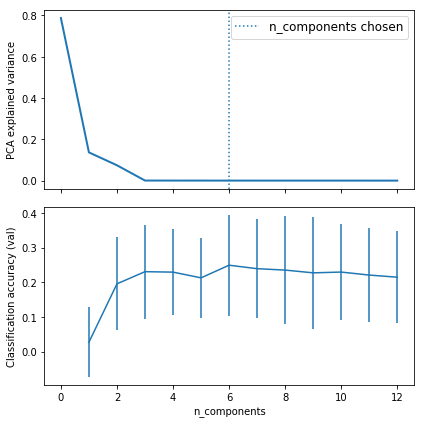

In [13]:
from sklearn.decomposition import PCA 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

model = LinearRegression()
pca = PCA()
pipe = Pipeline(steps=[('pca', pca), ('linear', model)])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'pca__n_components': np.arange(1,13)
}
search = GridSearchCV(pipe, param_grid, iid=False, cv=5,
                      return_train_score=False)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Plot the PCA spectrum
pca.fit(X_train)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(pca.explained_variance_ratio_, linewidth=2)
ax0.set_ylabel('PCA explained variance')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')

plt.tight_layout()
plt.show()

### GBR

In [14]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=30)

model.fit(X_train,y_train)

preds = model.predict(X_test)

evaluate_regression(y_test, preds)

RMSE = 7.5
MAE = 6.1

R² = 0.27




No handles with labels found to put in legend.


Most important features : 
 thalach     0.336829
trestbps    0.208539
ca          0.180957
chol        0.174982
oldpeak     0.030322
sex         0.018986
target      0.015879
restecg     0.009422
thal        0.008514
exang       0.006193
cp          0.004712
slope       0.004664
fbs         0.000000
dtype: float64


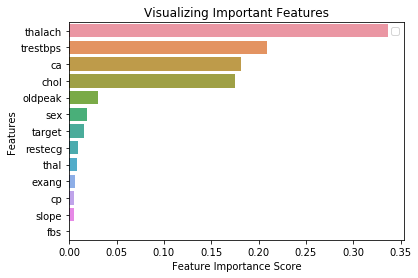

In [15]:
feature_imp = pd.Series(model.feature_importances_, index = feature_list).sort_values(ascending=False)
print("Most important features : \n",feature_imp)

%matplotlib inline
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

## Classification

In [16]:
target = "target"

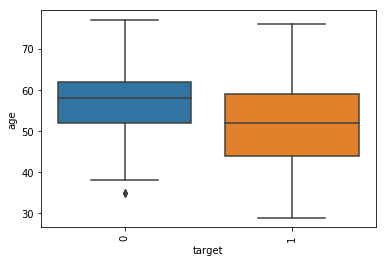

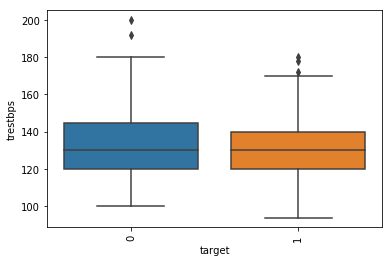

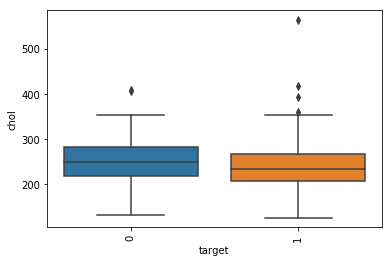

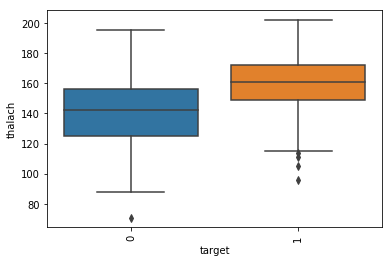

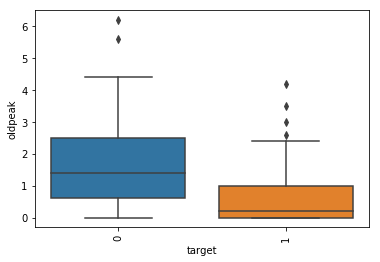

In [17]:
for y in numeric_columns:
    sns.boxplot(x = target, y = y, data=df, orient="v")
    plt.xticks(rotation=90)
    plt.show()

In [18]:
for col in factor_columns:
    if col != "target":
        print("--- {} ---".format(col))
        display(pd.crosstab(df[target], df[col]).style.background_gradient())

--- sex ---


sex,0,1
target,,
0,24,114
1,72,93


--- cp ---


cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


--- fbs ---


fbs,0,1
target,,
0,116,22
1,142,23


--- restecg ---


restecg,0,1,2
target,,,
0,79,56,3
1,68,96,1


--- exang ---


exang,0,1
target,,
0,62,76
1,142,23


--- slope ---


slope,0,1,2
target,,,
0,12,91,35
1,9,49,107


--- ca ---


ca,0,1,2,3,4
target,,,,,
0,45,44,31,17,1
1,130,21,7,3,4


--- thal ---


thal,0,1,2,3
target,,,,
0,1,12,36,89
1,1,6,130,28


In [19]:
y = df["target"].copy()
X = df.drop(["target"], axis=1)
print(X.head())
feature_list = list(X.columns)

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2  


First it's important to isolate the target variable

In oreder to get better estimates, let's normalize the data

Then we need to split the data into a training and testing set to be able to evaluate the quality of our model and its generalizability

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print("X_train shape = {}".format(X_train.shape))
print("X_test shape = {}".format(X_test.shape))

X_train shape = (212, 13)
X_test shape = (91, 13)


In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score

def evaluate_classification(actuals, preds):
    
    print("Accuracy = {:.1%}".format(accuracy_score(actuals, preds)))
    print("Precision = {:.1%}".format(precision_score(actuals, preds)))
    print("Recall = {:.1%}".format(recall_score(actuals, preds)))

    print("AUC = {:.1%}".format(roc_auc_score(actuals, preds, average="macro")))

    print("\nConfusion matrix: \n",confusion_matrix(actuals, preds))
    
    print("\n")

### Logistic regression

In [22]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

preds = lr.predict(X_test)

print("In sample evaluation \n---------------------")
evaluate_classification(y_train, lr.predict(X_train))

print("Out sample evaluation \n---------------------")
evaluate_classification(y_test, preds)

In sample evaluation 
---------------------
Accuracy = 87.3%
Precision = 86.1%
Recall = 91.3%
AUC = 86.9%

Confusion matrix: 
 [[ 80  17]
 [ 10 105]]


Out sample evaluation 
---------------------
Accuracy = 81.3%
Precision = 82.4%
Recall = 84.0%
AUC = 81.0%

Confusion matrix: 
 [[32  9]
 [ 8 42]]




/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


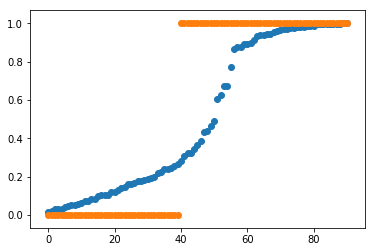

In [23]:
proba = lr.predict_proba(X_test)[:,0]
plt.scatter(range(len(proba)),np.sort(proba))
plt.scatter(range(len(preds)), np.sort(preds))
plt.show()

### Random Forest

Now let's train our model

In [24]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

It's time to evaluate the model

In [25]:
y_pred_train = model.predict(X_train)

print("In sample evaluation \n---------------------")
evaluate_classification(y_train, y_pred_train)

In sample evaluation 
---------------------
Accuracy = 100.0%
Precision = 100.0%
Recall = 100.0%
AUC = 100.0%

Confusion matrix: 
 [[ 97   0]
 [  0 115]]




In [26]:
y_pred = model.predict(X_test)

print("Out sample evaluation \n---------------------")
evaluate_classification(y_test, y_pred)

Out sample evaluation 
---------------------
Accuracy = 82.4%
Precision = 84.0%
Recall = 84.0%
AUC = 82.2%

Confusion matrix: 
 [[33  8]
 [ 8 42]]




This is not too bad (in practice we would accept the model, depending on the context and risks, if recall and precision are smaller

However we have here an illustration of overfitting. Indeed the performances on the training set are much better than on the test set.

Let's now dig into the results of the model and try to understand what happened

No handles with labels found to put in legend.


Most important features : 
 ca          0.153813
cp          0.126652
thalach     0.115358
thal        0.103697
oldpeak     0.102795
age         0.090480
chol        0.070137
trestbps    0.069880
exang       0.057715
slope       0.050101
sex         0.030270
restecg     0.019785
fbs         0.009318
dtype: float64


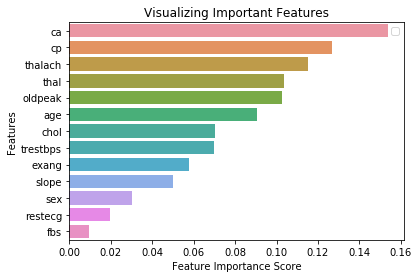

In [27]:
feature_imp = pd.Series(model.feature_importances_, index = feature_list).sort_values(ascending=False)
print("Most important features : \n",feature_imp)

%matplotlib inline
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

Let's change some parameters to try to improve performances on the test set

In [28]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=50)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score

y_pred_train = model.predict(X_train)

evaluate_classification(y_train, y_pred_train)

Accuracy = 100.0%
Precision = 100.0%
Recall = 100.0%
AUC = 100.0%

Confusion matrix: 
 [[ 97   0]
 [  0 115]]




In [30]:
y_pred = model.predict(X_test)

print("Out sample evaluation \n---------------------")
evaluate_classification(y_test, y_pred)

Out sample evaluation 
---------------------
Accuracy = 79.1%
Precision = 81.6%
Recall = 80.0%
AUC = 79.0%

Confusion matrix: 
 [[32  9]
 [10 40]]




GridSearch

/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best params= {'max_depth': 6, 'n_estimators': 21}
Best score= 0.8490566037735849
Out sample evaluation 
---------------------
Accuracy = 81.3%
Precision = 82.4%
Recall = 84.0%
AUC = 81.0%

Confusion matrix: 
 [[32  9]
 [ 8 42]]




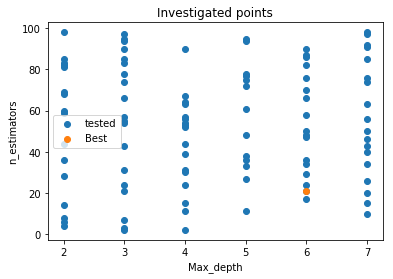

In [31]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

params = dict(
    n_estimators = np.arange(2,100,1),
    max_depth  = np.arange(2,8,1)
)

rf = RandomForestClassifier()

grid_search = RandomizedSearchCV(rf, 
                           param_distributions=params, 
                                 n_iter=100,
                           cv=3,
                          return_train_score = True,
                          )

gs = grid_search.fit(X_train, y_train)

results = pd.DataFrame(gs.cv_results_)

print("Best params= {}".format(gs.best_params_))
print("Best score= {}".format(gs.best_score_))

# display(results.sort_values(by = "mean_test_score", ascending=False))

plt.scatter(results["param_max_depth"], results["param_n_estimators"], label="tested")
plt.scatter(gs.best_params_["max_depth"], gs.best_params_["n_estimators"], label = "Best")
plt.legend()
plt.title("Investigated points")
plt.xlabel("Max_depth")
plt.ylabel("n_estimators")

best_model = gs.best_estimator_

y_pred = best_model.predict(X_test)

print("Out sample evaluation \n---------------------")
evaluate_classification(y_test, y_pred)

In [32]:
best_model = gs.best_estimator_

y_pred = best_model.predict(X_test)

print("Out sample evaluation \n---------------------")
evaluate_classification(y_test, y_pred)

Out sample evaluation 
---------------------
Accuracy = 81.3%
Precision = 82.4%
Recall = 84.0%
AUC = 81.0%

Confusion matrix: 
 [[32  9]
 [ 8 42]]




### KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(metric='minkowski',
                          n_neighbors = 2,
                          n_jobs=-1)

knn.fit(X_train, y_train)

preds = knn.predict(X_test)

evaluate_classification(y_test, preds)

Accuracy = 61.5%
Precision = 74.2%
Recall = 46.0%
AUC = 63.2%

Confusion matrix: 
 [[33  8]
 [27 23]]




### Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

preds = nb.predict(X_test)

evaluate_classification(y_test, preds)

Accuracy = 83.5%
Precision = 88.9%
Recall = 80.0%
AUC = 83.9%

Confusion matrix: 
 [[36  5]
 [10 40]]




### Neural network

In [35]:
def performance_nn(model):
    history = model.fit(X_train, y_train, 
          epochs=500, # to be modified
          validation_split = 0.3,
            verbose=0)

    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='upper left')
    plt.show()

    results = model.evaluate(X_train, y_train)
    print("Training Loss = {:.2f}, \t accuracy = {:.2f} \n".format(results[0], results[1]))

    results = model.evaluate(X_test, y_test)
    print("Testing Loss = {:.2f}, accuracy  = {:.2f} \n".format(results[0], results[1],))

    nn_preds = model.predict(X_test)

Using TensorFlow backend.


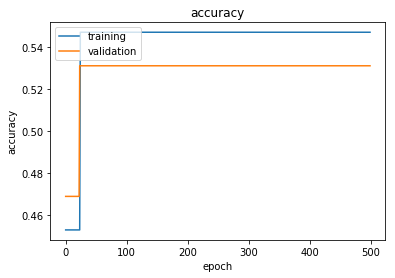

212/212 [==============================] - 0s 22us/step
Training Loss = 0.69, 	 accuracy = 0.54 

91/91 [==============================] - 0s 28us/step
Testing Loss = 0.69, accuracy  = 0.55 



In [36]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(10, input_dim=len(X_train.columns), kernel_initializer='normal', activation='tanh'))
model.add(Dense(6, kernel_initializer='normal', activation='tanh'))
model.add(Dense(1, kernel_initializer='normal', activation="relu"))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

performance_nn(model);

#### Image recognition

To conclude this workshop, let's switch to another dataset

In [36]:
from sklearn import datasets

df = datasets.load_digits()

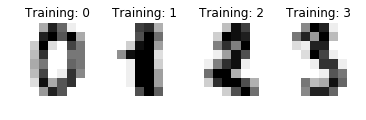

In [37]:
images_and_labels = list(zip(df.images, df.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [38]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

Classification report for classifier MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=3000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False):
             precision    recall  f1-score   support

          0       0.97      0.97      0.97        88
          1       0.98      0.89      0.93        91
          2       0.99      0.97      0.98        86
          3       0.94      0.88      0.91        91
          4       0.96      0.95      0.95        92
          5       0.95      0.96      0.95        91
          6       0.93      1.00      0.96        91
          7       0.95      0.94      0.95        89
          8       0.90      0.89      0.89        8

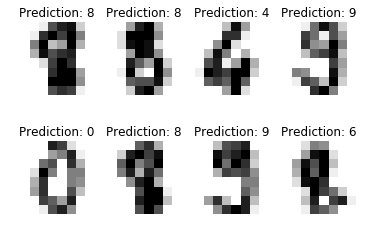

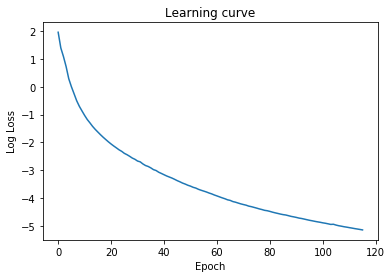

In [42]:
from sklearn import datasets, neural_network, metrics

classifier = neural_network.MLPClassifier(activation="relu",
#                                           hidden_layer_sizes = (100,),
                                          max_iter = 3000,
                                          random_state = 42,
#                                           n_iter_no_change=40,
                                          verbose=False)

# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples // 2], df.target[:n_samples // 2])

# Now predict the value of the digit on the second half:
expected = df.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(df.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:8]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

plt.plot(np.log(classifier.loss_curve_))
plt.ylabel("Log Loss")
plt.xlabel("Epoch")
plt.title("Learning curve");

# Going further

This introductory workshop to machine learning showed you how - easy - creating predictive models can be.

However note that we used a very simple dataset, with few cleaning steps and only numerical variables.

In practice we often need to go back and forth between modeling and cleaning until we achieve desired results.

Also model tuning and refinement might require some time with big datasets.

Here is a list of topic you could be interested in if you want to go further in unsupervised learning

* up/downsampling 
* Cross valisation & randomized gridsearch
* Advanced deep learning : RNN, CNN, GAM, LSTM, ...